# Chapter 5 - Resampling Methods

- [Part 1 - Cross Validation](#Part-1---Cross-Validation)
  - [Load dataset](#Load-dataset)
  - [5.1 Cross-Validation](#5.1-Cross-Validation)
  - [Figure 5.2 - Validation Set Approach](#Figure-5.2---Validation-Set-Approach)
  - [Figure 5.4 - LOOCV, 10-fold, 5-fold Comparision](#Figure-5.4---LOOCV,-10-fold,-5-fold-Comparision)
- [Part 2 - Bootstrap](#Part-2---Bootstrap)
  - [Simulate 4 different dataset and estimate 𝛼](#Simulate-4-different-dataset-and-estimate--$\alpha$)
  - [Repeat the above process 1000 time and plot histograms of 𝛼](#Repeat-the-above-process-1000-time-and-plot-histograms-of-$\alpha$)
  - [Generate 1000 bootstrap datasets and estimate 𝛼](#Generate-1000-bootstrap-datasets-and-estimate-$\alpha$)
- [Part 3 - Automation](#Part-3---Automation)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.utils import resample

%matplotlib inline

## Part 1 - Cross Validation

### Load dataset

Dataset available on http://www-bcf.usc.edu/~gareth/ISL/data.html

In [3]:
df = pd.read_csv('Data/Auto.csv', na_values='?').dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


## 5.1 Cross-Validation

### Figure 5.2 - Validation Set Approach
Using Polynomial feature generation in scikit-learn<BR>
http://scikit-learn.org/dev/modules/preprocessing.html#generating-polynomial-features

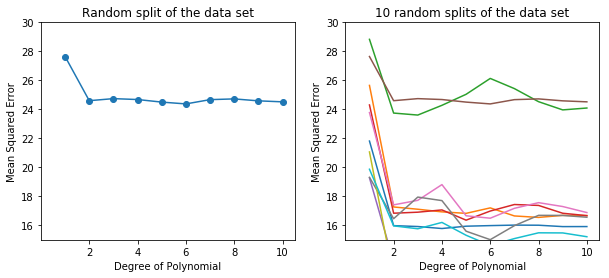

In [8]:
test_size = 0.1
degrees = range(1, 11)
MSEs = np.zeros((10, 10))

# Generate 10 random splits of the dataset (10개 polynomial degree * 10 random splits = 100 iterations)
for degree in degrees:
    for random_state in range(10):
        poly = PolynomialFeatures(degree)
        X = poly.fit_transform(df.horsepower.values.reshape(-1,1))
        y = df.mpg.ravel()
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

        regr = skl_lm.LinearRegression()
        regr.fit(X_train, y_train)
        y_pred = regr.predict(X_test)
        MSEs[degree-1,random_state]= mean_squared_error(y_test, y_pred)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

# Left plot (first split)
ax1.plot(degrees, MSEs[:, 5], '-o')
ax1.set_title('Random split of the data set')

# Right plot (all splits)
ax2.plot(degrees, MSEs)
ax2.set_title('10 random splits of the data set')

for ax in fig.axes:
    ax.set_ylabel('Mean Squared Error')
    ax.set_ylim(15, 30)
    ax.set_xlabel('Degree of Polynomial')
    ax.set_xlim(0, 10.5)
    ax.set_xticks(range(2, 11, 2));

In [9]:
df.horsepower.values.reshape(-1,1)

array([[130.],
       [165.],
       [150.],
       [150.],
       [140.],
       [198.],
       [220.],
       [215.],
       [225.],
       [190.],
       [170.],
       [160.],
       [150.],
       [225.],
       [ 95.],
       [ 95.],
       [ 97.],
       [ 85.],
       [ 88.],
       [ 46.],
       [ 87.],
       [ 90.],
       [ 95.],
       [113.],
       [ 90.],
       [215.],
       [200.],
       [210.],
       [193.],
       [ 88.],
       [ 90.],
       [ 95.],
       [100.],
       [105.],
       [100.],
       [ 88.],
       [100.],
       [165.],
       [175.],
       [153.],
       [150.],
       [180.],
       [170.],
       [175.],
       [110.],
       [ 72.],
       [100.],
       [ 88.],
       [ 86.],
       [ 90.],
       [ 70.],
       [ 76.],
       [ 65.],
       [ 69.],
       [ 60.],
       [ 70.],
       [ 95.],
       [ 80.],
       [ 54.],
       [ 90.],
       [ 86.],
       [165.],
       [175.],
       [150.],
       [153.],
       [150.],
       [20

### Figure 5.4 - LOOCV, 10-fold, 5-fold Comparision

In [10]:
degrees = range(1,11)

In [11]:
# LeaveOneOut Cross Validation
regr = skl_lm.LinearRegression()
loo = LeaveOneOut()

score_raw_loo = np.zeros([10, df.shape[0]])
score_mean_loo = []

for degree in degrees:
    poly = PolynomialFeatures(degree)
    X = poly.fit_transform(df.horsepower.values.reshape(-1,1))
    y = df.mpg.ravel()
    
    scores = cross_val_score(regr, X, y, cv=loo, scoring='neg_mean_squared_error')
    
    score_raw_loo[degree-1,:] = scores
    score_mean_loo.append(np.mean(scores))

In [12]:
#df.horsepower.values.reshape(-1,1)

In [13]:
df.horsepower.values

array([130., 165., 150., 150., 140., 198., 220., 215., 225., 190., 170.,
       160., 150., 225.,  95.,  95.,  97.,  85.,  88.,  46.,  87.,  90.,
        95., 113.,  90., 215., 200., 210., 193.,  88.,  90.,  95., 100.,
       105., 100.,  88., 100., 165., 175., 153., 150., 180., 170., 175.,
       110.,  72., 100.,  88.,  86.,  90.,  70.,  76.,  65.,  69.,  60.,
        70.,  95.,  80.,  54.,  90.,  86., 165., 175., 150., 153., 150.,
       208., 155., 160., 190.,  97., 150., 130., 140., 150., 112.,  76.,
        87.,  69.,  86.,  92.,  97.,  80.,  88., 175., 150., 145., 137.,
       150., 198., 150., 158., 150., 215., 225., 175., 105., 100., 100.,
        88.,  95.,  46., 150., 167., 170., 180., 100.,  88.,  72.,  94.,
        90.,  85., 107.,  90., 145., 230.,  49.,  75.,  91., 112., 150.,
       110., 122., 180.,  95., 100., 100.,  67.,  80.,  65.,  75., 100.,
       110., 105., 140., 150., 150., 140., 150.,  83.,  67.,  78.,  52.,
        61.,  75.,  75.,  75.,  97.,  93.,  67.,  9

In [12]:
df.horsepower

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
5      198.0
6      220.0
7      215.0
8      225.0
9      190.0
10     170.0
11     160.0
12     150.0
13     225.0
14      95.0
15      95.0
16      97.0
17      85.0
18      88.0
19      46.0
20      87.0
21      90.0
22      95.0
23     113.0
24      90.0
25     215.0
26     200.0
27     210.0
28     193.0
29      88.0
       ...  
367     88.0
368     88.0
369     88.0
370     85.0
371     84.0
372     90.0
373     92.0
374     74.0
375     68.0
376     68.0
377     63.0
378     70.0
379     88.0
380     75.0
381     70.0
382     67.0
383     67.0
384     67.0
385    110.0
386     85.0
387     92.0
388    112.0
389     96.0
390     84.0
391     90.0
392     86.0
393     52.0
394     84.0
395     79.0
396     82.0
Name: horsepower, Length: 392, dtype: float64

In [13]:
X

array([[1.00000000e+00, 1.30000000e+02, 1.69000000e+04, ...,
        8.15730721e+16, 1.06044994e+19, 1.37858492e+21],
       [1.00000000e+00, 1.65000000e+02, 2.72250000e+04, ...,
        5.49378367e+17, 9.06474305e+19, 1.49568260e+22],
       [1.00000000e+00, 1.50000000e+02, 2.25000000e+04, ...,
        2.56289062e+17, 3.84433594e+19, 5.76650391e+21],
       ...,
       [1.00000000e+00, 8.40000000e+01, 7.05600000e+03, ...,
        2.47875891e+15, 2.08215749e+17, 1.74901229e+19],
       [1.00000000e+00, 7.90000000e+01, 6.24100000e+03, ...,
        1.51710881e+15, 1.19851596e+17, 9.46827608e+18],
       [1.00000000e+00, 8.20000000e+01, 6.72400000e+03, ...,
        2.04414086e+15, 1.67619550e+17, 1.37448031e+19]])

In [15]:
df.mpg.ravel()

array([18. , 15. , 18. , 16. , 17. , 15. , 14. , 14. , 14. , 15. , 15. ,
       14. , 15. , 14. , 24. , 22. , 18. , 21. , 27. , 26. , 25. , 24. ,
       25. , 26. , 21. , 10. , 10. , 11. ,  9. , 27. , 28. , 25. , 19. ,
       16. , 17. , 19. , 18. , 14. , 14. , 14. , 14. , 12. , 13. , 13. ,
       18. , 22. , 19. , 18. , 23. , 28. , 30. , 30. , 31. , 35. , 27. ,
       26. , 24. , 25. , 23. , 20. , 21. , 13. , 14. , 15. , 14. , 17. ,
       11. , 13. , 12. , 13. , 19. , 15. , 13. , 13. , 14. , 18. , 22. ,
       21. , 26. , 22. , 28. , 23. , 28. , 27. , 13. , 14. , 13. , 14. ,
       15. , 12. , 13. , 13. , 14. , 13. , 12. , 13. , 18. , 16. , 18. ,
       18. , 23. , 26. , 11. , 12. , 13. , 12. , 18. , 20. , 21. , 22. ,
       18. , 19. , 21. , 26. , 15. , 16. , 29. , 24. , 20. , 19. , 15. ,
       24. , 20. , 11. , 20. , 19. , 15. , 31. , 26. , 32. , 25. , 16. ,
       16. , 18. , 16. , 13. , 14. , 14. , 14. , 29. , 26. , 26. , 31. ,
       32. , 28. , 24. , 26. , 24. , 26. , 31. , 19

In [16]:
df.mpg

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
5      15.0
6      14.0
7      14.0
8      14.0
9      15.0
10     15.0
11     14.0
12     15.0
13     14.0
14     24.0
15     22.0
16     18.0
17     21.0
18     27.0
19     26.0
20     25.0
21     24.0
22     25.0
23     26.0
24     21.0
25     10.0
26     10.0
27     11.0
28      9.0
29     27.0
       ... 
367    28.0
368    27.0
369    34.0
370    31.0
371    29.0
372    27.0
373    24.0
374    36.0
375    37.0
376    31.0
377    38.0
378    36.0
379    36.0
380    36.0
381    34.0
382    38.0
383    32.0
384    38.0
385    25.0
386    38.0
387    26.0
388    22.0
389    32.0
390    36.0
391    27.0
392    27.0
393    44.0
394    32.0
395    28.0
396    31.0
Name: mpg, Length: 392, dtype: float64

In [17]:
score_raw_loo

array([[-2.02001002e+00, -1.25092412e+00, -3.06805164e+00, ...,
        -2.85218299e+01, -2.87124380e-01, -1.61698064e+01],
       [-8.36118880e-01, -2.35189626e+00, -1.13323296e+01, ...,
        -3.13115705e+01, -6.25167592e-02, -1.65425226e+01],
       [-7.26398939e-01, -1.52681593e+00, -9.88510026e+00, ...,
        -3.27876023e+01, -1.14965381e-01, -1.74967778e+01],
       ...,
       [-1.06021057e+00, -4.68163876e-01, -6.14133135e+00, ...,
        -3.05701175e+01, -6.46486461e-03, -1.51506896e+01],
       [-9.21418600e-01, -5.85614840e-01, -7.17769955e+00, ...,
        -3.19650908e+01, -8.30445329e-03, -1.62958243e+01],
       [-4.15524886e-01, -1.32991581e+00, -7.50359498e+00, ...,
        -3.28004350e+01, -1.29188651e-02, -1.67382418e+01]])

In [18]:
score_raw_loo.shape

(10, 392)

In [15]:
# 10-fold Cross Validation
folds = 10

kf_10 = KFold(n_splits=folds)

score_raw_10fold = np.zeros([10, folds])
score_mean_10fold = []

for degree in degrees:
    poly = PolynomialFeatures(degree)
    X = poly.fit_transform(df.horsepower.values.reshape(-1,1))
    y = df.mpg.ravel()
    
    scores = cross_val_score(regr, X, y, cv=kf_10, scoring='neg_mean_squared_error')
    
    score_raw_10fold[degree-1,:] = scores
    score_mean_10fold.append(np.mean(scores))

In [16]:
# 5-fold Cross Validation
folds = 5

score_raw_5fold = np.zeros([10, folds])
score_mean_5fold = []

for degree in degrees:
    poly = PolynomialFeatures(degree)
    X = poly.fit_transform(df.horsepower.values.reshape(-1,1))
    y = df.mpg.ravel()
    
    scores = cross_val_score(regr, X, y, cv=folds, scoring='neg_mean_squared_error')
    
    score_raw_5fold[degree-1,:] = scores
    score_mean_5fold.append(np.mean(scores))

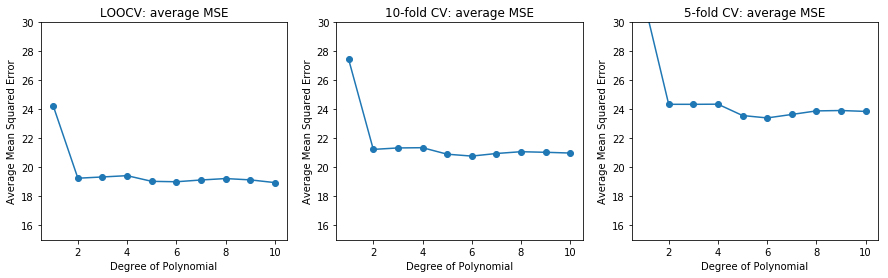

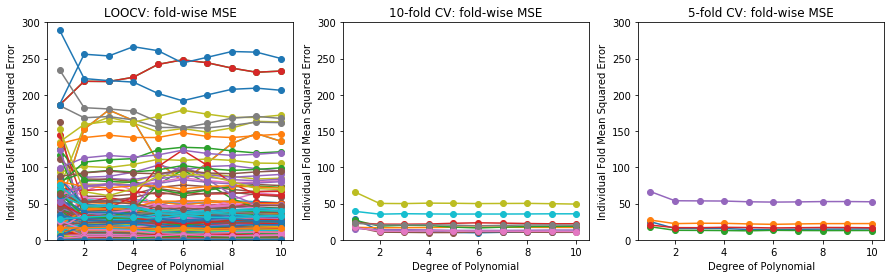

In [17]:
## Upper plot
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4))

# Left plot
ax1.set_title('LOOCV: average MSE')
ax1.plot(degrees, np.array(score_mean_loo)*-1, '-o')

# Middle plot
ax2.set_title('10-fold CV: average MSE')
ax2.plot(degrees, np.array(score_mean_10fold)*-1,'-o')

# Right plot
ax3.set_title('5-fold CV: average MSE')
ax3.plot(degrees, np.array(score_mean_5fold)*-1,'-o')

for ax in fig.axes:
    ax.set_ylabel('Average Mean Squared Error')
    ax.set_ylim(15, 30)
    ax.set_xlabel('Degree of Polynomial')
    ax.set_xlim(0.5, 10.5)
    ax.set_xticks(range(2, 11, 2));
plt.show()
    

## Lower plot
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4))

# Left plot
for i in range(df.shape[0]):
    ax1.set_title('LOOCV: fold-wise MSE')
    ax1.plot(degrees, score_raw_loo[:,i]*-1,'-o')

# Middle plot
for i in range(10):
    ax2.set_title('10-fold CV: fold-wise MSE')
    ax2.plot(degrees, score_raw_10fold[:,i]*-1,'-o')

# Right plot
for i in range(5):
    ax3.set_title('5-fold CV: fold-wise MSE')
    ax3.plot(degrees, score_raw_5fold[:,i]*-1,'-o')

for ax in fig.axes:
    ax.set_ylabel('Individual Fold Mean Squared Error')
    ax.set_ylim(0, 300)
    ax.set_xlabel('Degree of Polynomial')
    ax.set_xlim(0.5, 10.5)
    ax.set_xticks(range(2, 11, 2));
plt.show()

## Part 2 - Bootstrap
### Simulate 4 different dataset and estimate  $\alpha$

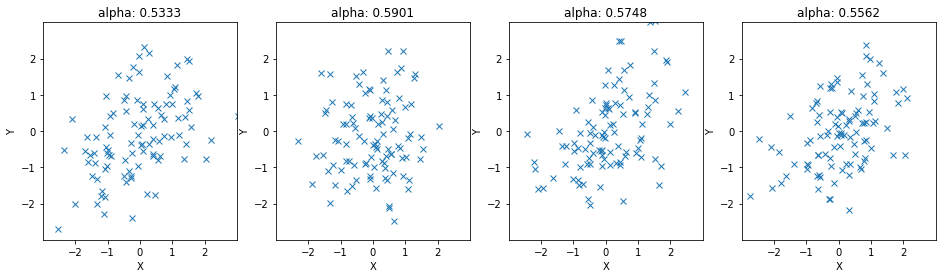

In [9]:
mean = [0, 0]
cov = [[1,   0.5],
       [0.5, 1.25]]

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16,4))
n_samples = 100

def calc_alpha(x, y):
    '''
    Lecture5-2 Cross Validation, slide 36/66
    '''
    var_x = np.var(x)
    var_y = np.var(y)
    cov_xy = np.cov(x,y)[0,1]
    a_hat = (var_y - cov_xy)/(var_x + var_y - 2*cov_xy)
    return a_hat

# 1st plot
x, y = np.random.multivariate_normal(mean, cov, n_samples).T
title = 'alpha: {:.4f}'.format(calc_alpha(x, y))
ax1.set_title(title)
ax1.plot(x, y, 'x')

# 2nd plot
x, y = np.random.multivariate_normal(mean, cov, n_samples).T
title = 'alpha: {:.4f}'.format(calc_alpha(x, y))
ax2.set_title(title)
ax2.plot(x, y, 'x')

# 3rd plot
x, y = np.random.multivariate_normal(mean, cov, n_samples).T
title = 'alpha: {:.4f}'.format(calc_alpha(x, y))
ax3.set_title(title)
ax3.plot(x, y, 'x')

# 4th plot
x, y = np.random.multivariate_normal(mean, cov, n_samples).T
title = 'alpha: {:.4f}'.format(calc_alpha(x, y))
ax4.set_title(title)
ax4.plot(x, y, 'x')

for ax in fig.axes:
    ax.set_ylabel('Y')
    ax.set_ylim(-3, 3)
    ax.set_xlabel('X')
    ax.set_xlim(-3, 3)
    ax.set_xticks(range(-2, 3, 1));
    ax.set_yticks(range(-2, 3, 1));

### Repeat the above process 1000 time and plot histograms of $\alpha$

Estimated alpha from 1000 simulated datasets: 0.6011 +- 0.0830


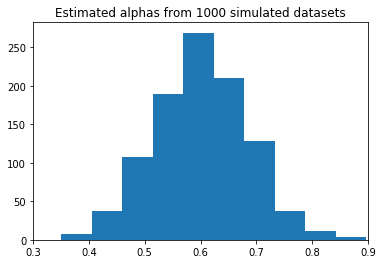

In [10]:
a_hat_list = []
for i in range(1000):
    x, y = np.random.multivariate_normal(mean, cov, n_samples).T
    a_hat_list.append(calc_alpha(x, y))

print('Estimated alpha from 1000 simulated datasets: {:.4f} +- {:.4f}'.format(np.mean(a_hat_list), np.std(a_hat_list)))

plt.figure()
plt.title('Estimated alphas from 1000 simulated datasets')
plt.hist(a_hat_list)
plt.xlim(0.3, 0.9)
plt.show()

### Generate 1000 bootstrap datasets and estimate $\alpha$

Estimated alpha from 1000 bootstrap datasets from a single simulation dataset: 0.6634 +- 0.0846


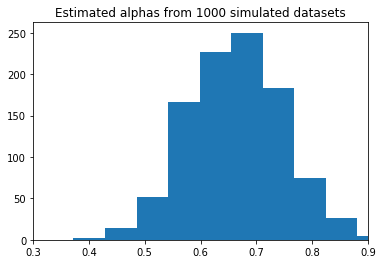

In [11]:
x, y = np.random.multivariate_normal(mean, cov, n_samples).T

a_hat_list = []
for i in range(1000):
    x_hat, y_hat = resample(x, y, n_samples=n_samples)
    a_hat_list.append(calc_alpha(x_hat, y_hat))

print('Estimated alpha from 1000 bootstrap datasets from a single simulation dataset: {:.4f} +- {:.4f}'.format(np.mean(a_hat_list), np.std(a_hat_list)))

plt.figure()
plt.title('Estimated alphas from 1000 simulated datasets')
plt.hist(a_hat_list)
plt.xlim(0.3, 0.9)
plt.show()

## Part 3 - Automation

### Pipeline

In [12]:
import random

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from visualize import plot_confusion_matrix

In [13]:
standard_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=2)),
], memory='.', verbose=True)

In [14]:
standard_knn.get_params()

{'knn': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                      weights='uniform'),
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 2,
 'knn__p': 2,
 'knn__weights': 'uniform',
 'memory': '.',
 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'steps': [('scaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('knn',
   KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                        metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                        weights='uniform'))],
 'verbose': True}

In [15]:
standard_knn.set_params(knn__n_neighbors=1)
standard_knn.get_params()

{'knn': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                      weights='uniform'),
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform',
 'memory': '.',
 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'steps': [('scaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('knn',
   KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                        metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                        weights='uniform'))],
 'verbose': True}

In [16]:
iris = load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [17]:
standard_knn.fit(X_train, y_train)

[Pipeline] ............... (step 2 of 2) Processing knn, total=   0.0s


Pipeline(memory='.',
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=1, p=2,
                                      weights='uniform'))],
         verbose=True)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



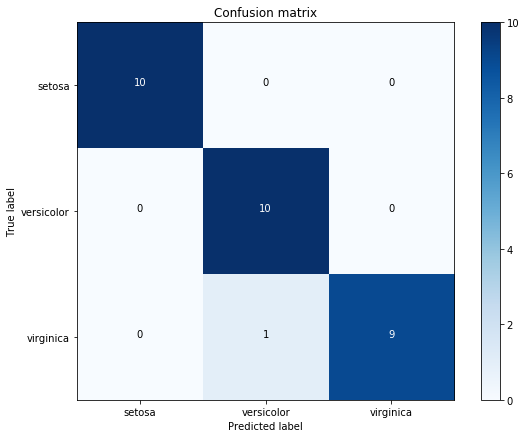

In [18]:
y_pred = standard_knn.predict(X_test)

print(classification_report(y_test, y_pred, target_names=target_names))
plot_confusion_matrix(y_test, y_pred, target_names=target_names)

[Pipeline] ............... (step 2 of 2) Processing knn, total=   0.0s
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



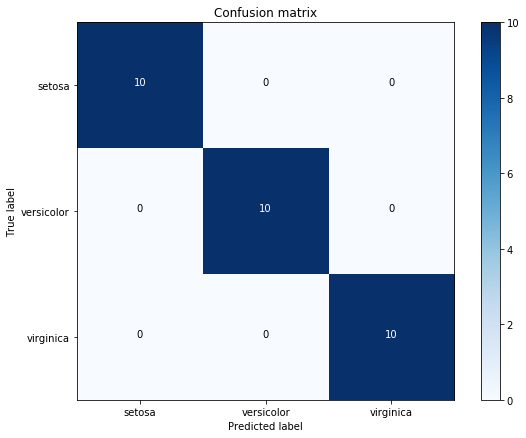

In [19]:
standard_knn.set_params(knn__n_neighbors=15)
standard_knn.fit(X_train, y_train)
y_pred = standard_knn.predict(X_test)

print(classification_report(y_test, y_pred, target_names=target_names))
plot_confusion_matrix(y_test, y_pred, target_names=target_names)

### Grid Search

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

standard_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=2)),
], memory='.')

standard_knn.get_params()

{'knn': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                      weights='uniform'),
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 2,
 'knn__p': 2,
 'knn__weights': 'uniform',
 'memory': '.',
 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'steps': [('scaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('knn',
   KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                        metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                        weights='uniform'))],
 'verbose': False}

In [21]:
# Set the parameters by cross-validation
param_grid = [ # dict or list of dicts
    {
        'scaler__with_mean': [True],
        'knn__n_neighbors': [1, 2, 3, 4, 5],
    },
    {
        'scaler__with_mean': [False],
        'knn__n_neighbors': [15, 30],
    }
]

clf = GridSearchCV(standard_knn, param_grid=param_grid, scoring='precision_macro', cv=5, n_jobs=-1)
clf.fit(X_train, y_train)

print('-'*50)
print('# Tuning hyper-parameters for macro precision score')
print("Best parameters set found on development set:")
print(clf.best_params_)
print()
print("Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print('{:.3f} (+/-{:.3f}) for {}'.format(mean, 2*std, params))
print()
print("Detailed classification report:")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()

--------------------------------------------------
# Tuning hyper-parameters for macro precision score
Best parameters set found on development set:
{'knn__n_neighbors': 4, 'scaler__with_mean': True}

Grid scores on development set:
0.939 (+/-0.042) for {'knn__n_neighbors': 1, 'scaler__with_mean': True}
0.934 (+/-0.062) for {'knn__n_neighbors': 2, 'scaler__with_mean': True}
0.938 (+/-0.065) for {'knn__n_neighbors': 3, 'scaler__with_mean': True}
0.951 (+/-0.029) for {'knn__n_neighbors': 4, 'scaler__with_mean': True}
0.948 (+/-0.039) for {'knn__n_neighbors': 5, 'scaler__with_mean': True}
0.942 (+/-0.037) for {'knn__n_neighbors': 15, 'scaler__with_mean': False}
0.899 (+/-0.085) for {'knn__n_neighbors': 30, 'scaler__with_mean': False}

Detailed classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accu

### Leave-One-Group-Out

In [22]:
from sklearn.model_selection import LeaveOneOut, LeaveOneGroupOut

X = [[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8], [8, 9], [9, 10]]
Y = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
groups = [0, 0, 2, 2, 3, 3, 4, 4, 4, 4]

loo = LeaveOneOut()
logo = LeaveOneGroupOut()

In [23]:
for train_idx, test_idx in loo.split(X):
    print('train:{:19}, test:{}'.format(str(train_idx), str(test_idx)))

train:[1 2 3 4 5 6 7 8 9], test:[0]
train:[0 2 3 4 5 6 7 8 9], test:[1]
train:[0 1 3 4 5 6 7 8 9], test:[2]
train:[0 1 2 4 5 6 7 8 9], test:[3]
train:[0 1 2 3 5 6 7 8 9], test:[4]
train:[0 1 2 3 4 6 7 8 9], test:[5]
train:[0 1 2 3 4 5 7 8 9], test:[6]
train:[0 1 2 3 4 5 6 8 9], test:[7]
train:[0 1 2 3 4 5 6 7 9], test:[8]
train:[0 1 2 3 4 5 6 7 8], test:[9]


In [24]:
for train_idx, test_idx in logo.split(X, Y, groups):
    print('train:{:17}, test:{}'.format(str(train_idx), str(test_idx)))

train:[2 3 4 5 6 7 8 9], test:[0 1]
train:[0 1 4 5 6 7 8 9], test:[2 3]
train:[0 1 2 3 6 7 8 9], test:[4 5]
train:[0 1 2 3 4 5]    , test:[6 7 8 9]


In [25]:
param_grid = { # dict or list of dicts
    'knn__n_neighbors': [1, 5],
}

clf = GridSearchCV(standard_knn, param_grid=param_grid, scoring='precision_macro', cv=logo, n_jobs=-1)
clf = clf.fit(X, Y, groups)

In [26]:
clf.cv_results_

{'mean_fit_time': array([0.00548249, 0.00334489]),
 'mean_score_time': array([0.00226015, 0.0020473 ]),
 'mean_test_score': array([0., 0.]),
 'param_knn__n_neighbors': masked_array(data=[1, 5],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'knn__n_neighbors': 1}, {'knn__n_neighbors': 5}],
 'rank_test_score': array([1, 1], dtype=int32),
 'split0_test_score': array([0., 0.]),
 'split1_test_score': array([0., 0.]),
 'split2_test_score': array([0., 0.]),
 'split3_test_score': array([0., 0.]),
 'std_fit_time': array([0.00019345, 0.00121609]),
 'std_score_time': array([8.31474967e-05, 7.25875926e-05]),
 'std_test_score': array([0., 0.])}

In [27]:
clf.best_params_

{'knn__n_neighbors': 1}